In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from IPython.display import Markdown
import math

# 1. Function definition
The set of function that will be optimized in first place are:
$$
\begin{array}\\
    f_1 (x,y) = 4x^2+4y^2\\
    f_2 (x,y) = (x-5)^2+(y-5)^2
\end{array}
$$
subjected to the next set of constraints:
$$
\begin{array}\\
    g_1(x,y)=(x-5)^2+y^2\leq25 \\
    g_2(x,y)=(x-8)^2+(y+3)^2\geq7.7
\end{array}
$$
in the domain limited by
$$
\begin{array}\\
    0 \leq x \leq 5 \\
    0 \leq y \leq 3
\end{array}
$$

In [5]:
# True Pareto front load from MOEA framework 
TPF = np.genfromtxt('./Binh2.pf')

Text(0.5,1,'Function values for valid $x-y$ points')

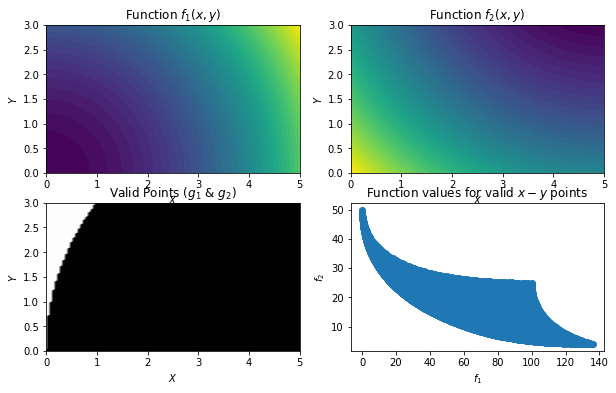

In [6]:
x = np.linspace(0,5,100)
y = np.linspace(0,3,100)
X, Y = np.meshgrid(x,y)
F1 = 4*X**2+4*Y**2
F2 = (X-5)**2+(Y-5)**2
G1 = (X-5)**2+Y**2
G1 = G1 < 25.0001
G2 = (X-8)**2+(Y+3)**2
G2 = G2 > 7.699999
G = np.logical_and(G1, G2)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10,6))
ax1.contourf(X,Y,F1,50)
ax1.set_xlim([0,5])
ax1.set_ylim([0,3])
ax1.set_xlabel(r'$X$')
ax1.set_ylabel(r'$Y$')
ax1.set_title(r'Function $f_1(x,y)$')
ax2.contourf(X,Y,F2,50)
ax2.set_xlim([0,5])
ax2.set_ylim([0,3])
ax2.set_xlabel(r'$X$')
ax2.set_ylabel(r'$Y$')
ax2.set_title(r'Function $f_2(x,y)$')
ax3.contourf(X,Y,G,50, cmap=cm.binary)
ax3.set_xlim([0,5])
ax3.set_ylim([0,3])
ax3.set_xlabel(r'$X$')
ax3.set_ylabel(r'$Y$')
ax3.set_title(r'Valid Points ($g_1$ & $g_2$)')
ax4.scatter(F1[G],F2[G])
ax4.set_xlabel(r'$f_1$')
ax4.set_ylabel(r'$f_2$')
ax4.set_title(r'Function values for valid $x-y$ points')

## 1.1 Optimization functions
The optimization functions will be minimized. All the optimization functions will be included in the same function, allowing the user to select (with Python notation) the function from which the results is wanted at each moment.

In [7]:
funNo = 2

In [8]:
def fun(x,y,no):
    #Attribute of the function to know the real number of callings to the function
    fun.counter += x.shape[0]/funNo
    if no == 0:
        return 4*x**2+4*y**2
    if no == 1:
        return (x-5)**2+(y-5)**2

## 1.2 Constraints
These will be defined as just one matrix, so it will allow further upgrading.

In [9]:
def const(x,y,no):
    #Let's use Python notation so the first equation will be no=0...
    if no == 0:
        return (x-5)**2+y**2
    if no == 1:
        return (x-8)**2+(y+3)**2

## 1.3 Comparison mode and values

In [10]:
constVal = [25, 7.7]
compMode = ['leq', 'geq']

## 1.4 Domain limits

In [11]:
x_low = 0
x_high = 5
y_low = 0
y_high = 3

# 2. Monte Carlo approach (= random search)

In [12]:
#Number of used points
noPoints = 500

#Get a random set of points
x = x_low+np.random.rand(noPoints)*(x_high-x_low)
y = y_low+np.random.rand(noPoints)*(y_high-y_low)

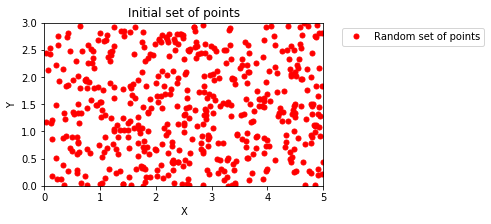

In [13]:
fig, ax1 = plt.subplots(1, figsize=(x_high-x_low, y_high-y_low))
ax1.plot(x,y,'.',c='r',markersize = 10, label='Random set of points')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_xlim([x_low, x_high])
ax1.set_ylim([y_low, y_high])
ax1.set_title('Initial set of points')
ax1.legend(bbox_to_anchor=(1.05,1.0))

In [14]:
#Make a copy of the points X-Y to extract the valid ones
valid_x = np.copy(x)
valid_y = np.copy(y)
#Let's get the points that are valid under the constraints
for i in range(len(constVal)):
    if compMode[i] == 'leq':
        boolMat = np.logical_or(const(valid_x, valid_y, i) < constVal[i], const(valid_x, valid_y, i) == constVal[i])
    elif compMode[i] == 'less':
        boolMat = const(valid_x, valid_y, i) < constVal[i]
    elif compMode[i] == 'geq':
        boolMat = np.logical_or(const(valid_x, valid_y, i) > constVal[i], const(valid_x, valid_y, i) == constVal[i])
    elif compMode[i] == 'greater':
        boolMat = const(valid_x, valid_y, i) > constVal[i]
    elif compMode[i] == 'eq':
        boolMat = const(valid_x, valid_y, i) == constVal[i]
    else:
        print('Bad comparison mode matrix')
    valid_x = valid_x[boolMat] 
    valid_y = valid_y[boolMat]

In [15]:
if len(valid_x) != len(valid_y):
    print("\x1b[31mError in dimensions\x1b[0m")

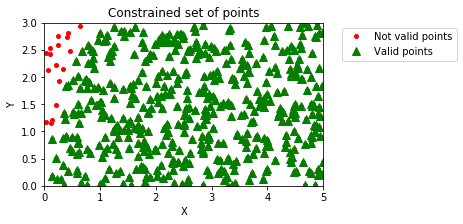

In [16]:
fig, ax1 = plt.subplots(1, figsize=(x_high-x_low, y_high-y_low))
ax1.plot(x,y,'.',c='r',markersize = 8, label='Not valid points')
ax1.plot(valid_x,valid_y,'^',c='g', markersize=8, label='Valid points')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_xlim([x_low, x_high])
ax1.set_ylim([y_low, y_high])
ax1.set_title('Constrained set of points')
ax1.legend(bbox_to_anchor=(1.05,1.0))

In [17]:
#Evaluate the function for all points and for the valid ones
valid_values = np.zeros([len(valid_x), funNo])
all_values = np.zeros([len(x), funNo])

#Function attribute counter
fun.counter = 0

for i in range(funNo):
    valid_values[:,i] = fun(valid_x, valid_y, i)

#True number of calllings to the function
MC_eval = fun.counter

for i in range(funNo):
    all_values[:,i] = fun(x, y, i)

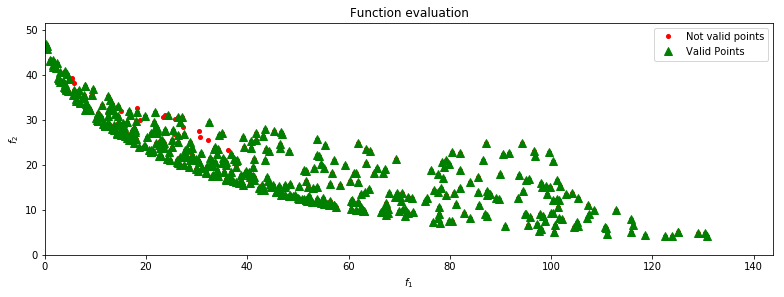

In [18]:
fig, ax1 = plt.subplots(1, figsize=((max(all_values[:,0])-min(all_values[:,0]))/10, (max(all_values[:,1])-min(all_values[:,1]))/10))
ax1.plot(all_values[:,0], all_values[:,1],'.',c='r',markersize = 8, label='Not valid points')
ax1.plot(valid_values[:,0], valid_values[:,1],'^',c='g', markersize=8, label='Valid Points')
ax1.set_xlabel('$f_1$')
ax1.set_ylabel('$f_2$')
ax1.set_xlim([0, 1.1*max(all_values[:,0])])
ax1.set_ylim([0, 1.1*max(all_values[:,1])])
ax1.set_title('Function evaluation')
ax1.legend()

Once the values have been computed, the Skyline operator will be included. In order to get the values that are not dominated by any of the other possible values, each point will divide the domain in 4 parts. If there is a point with a smaller X and Y (i.e. a more minimum value for both functions), the first point will be dominated and therefore it should not be in the Pareto front. A visual explanation is shown in the next cell before moving on to the function definition and usage for this set of points.

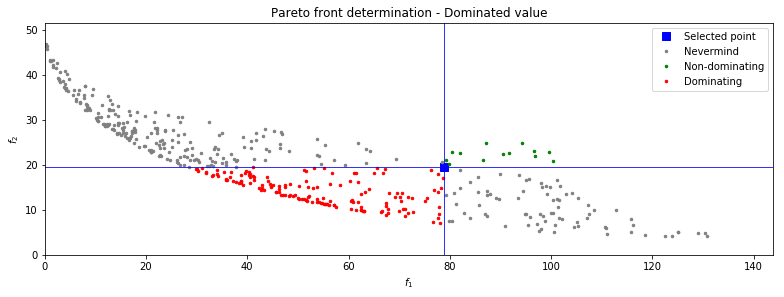

In [19]:
#Selection of a random point to make the example
pt = valid_values[np.random.randint(0,len(valid_values)),:]
#Creation of the 4 cuadrants arrays
ul = valid_values[np.logical_and(valid_values[:,0]<pt[0],valid_values[:,1]>pt[1])] #Upper left
ur = valid_values[np.logical_and(valid_values[:,0]>pt[0],valid_values[:,1]>pt[1])] #Upper right
ll = valid_values[np.logical_and(valid_values[:,0]<pt[0],valid_values[:,1]<pt[1])] #Lower left
lr = valid_values[np.logical_and(valid_values[:,0]>pt[0],valid_values[:,1]<pt[1])] #Lower right

fig, ax1 = plt.subplots(1, figsize=((max(all_values[:,0])-min(all_values[:,0]))/10, (max(all_values[:,1])-min(all_values[:,1]))/10))
ax1.plot(pt[0], pt[1],'s',c='b', markersize=8, label='Selected point')
ax1.plot(ul[:,0], ul[:,1],'.',c='gray', markersize=5, label='Nevermind')
ax1.plot(ur[:,0], ur[:,1],'.',c='g', markersize=5, label='Non-dominating')
ax1.plot(ll[:,0], ll[:,1],'.',c='r', markersize=5, label='Dominating')
ax1.plot(lr[:,0], lr[:,1],'.',c='gray', markersize=5)
ax1.plot([0, 1.1*max(all_values[:,0])], [pt[1], pt[1]], c='b', linewidth=0.8)
ax1.plot([pt[0], pt[0]], [0, 1.1*max(all_values[:,1])], c='b', linewidth=0.8)
ax1.set_xlabel('$f_1$')
ax1.set_ylabel('$f_2$')
ax1.set_xlim([0, 1.1*max(all_values[:,0])])
ax1.set_ylim([0, 1.1*max(all_values[:,1])])
if np.shape(ll)[0] == 0:
    ax1.set_title('Pareto front determination - Non-dominated value')
else:
    ax1.set_title('Pareto front determination - Dominated value')
ax1.legend();

In [49]:
def skyline(coordPts, ePts):
    #Let's check if both coord(inated)P(oin)ts and e(valuated)P(oin)ts have the correct shape
    if ePts.shape[1] != 2 or ePts.shape[0] != coordPts.shape[0]:
        print('Non consistent input array')
        return
    else:
        paretoFront = np.zeros([coordPts.shape[0],4]) # x - y - f1 - f2
    #In case it has the correct shape, let's loop over it
    for i in range(ePts.shape[0]):
        pt = ePts[i,:]
        ll = ePts[np.logical_and(ePts[:,0]<pt[0],ePts[:,1]<pt[1])] #Lower left array
        if ll.shape[0] == 0: #non dominated value
            paretoFront[i,0:2] = pt[:]
            paretoFront[i,2:] = coordPts[i,:]
    #Remove the rows with zero values
    nonZeroValues = np.logical_and.reduce((paretoFront[:,0] != 0.0, paretoFront[:,1] != 0.0, paretoFront[:,2] != 0.0, paretoFront[:,3] != 0.0))
    #Return the non dominated values (i.e. Pareto Front)
    return paretoFront[nonZeroValues]

In [50]:
PF = skyline(np.array([valid_x, valid_y]).T, valid_values)

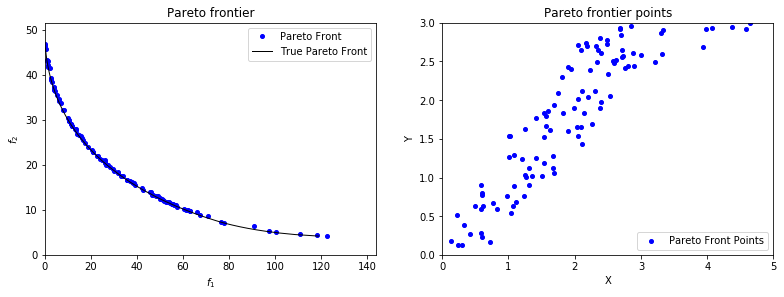

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=((max(all_values[:,0])-min(all_values[:,0]))/10, (max(all_values[:,1])-min(all_values[:,1]))/10))
ax1.plot(PF[:,0], PF[:,1],'.',c='b', markersize=8, label='Pareto Front')
ax1.plot(TPF[np.argsort(TPF[:,0]),0],TPF[np.argsort(TPF[:,0]),1], 'k', linewidth=1,label='True Pareto Front')
ax1.set_xlabel('$f_1$')
ax1.set_ylabel('$f_2$')
ax1.set_xlim([0, 1.1*max(all_values[:,0])])
ax1.set_ylim([0, 1.1*max(all_values[:,1])])
ax1.set_title('Pareto frontier')
ax1.legend()
ax2.plot(PF[:,2], PF[:,3],'.',c='b', markersize=8, label='Pareto Front Points')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_xlim([x_low, x_high])
ax2.set_ylim([y_low, y_high])
ax2.set_title('Pareto frontier points')
ax2.legend(loc='lower right')

Let's define a function to get the values for a Monte Carlo simulation of the case

In [23]:
def GAMC(noPoints, x_low, x_high, y_low, y_high):
    #Get a random set of points
    x = x_low+np.random.rand(noPoints)*(x_high-x_low)
    y = y_low+np.random.rand(noPoints)*(y_high-y_low)
    #Make a copy of the points X-Y to extract the valid ones
    valid_x = np.copy(x)
    valid_y = np.copy(y)
    #Let's get the points that are valid under the constraints
    boolMat = np.zeros((noPoints))
    while sum(boolMat) != 0:
        for i in range(len(constVal)):
            if compMode[i] == 'leq':
                boolMat = np.logical_or(const(valid_x, valid_y, i) < constVal[i], const(valid_x, valid_y, i) == constVal[i])
            elif compMode[i] == 'less':
                boolMat = const(valid_x, valid_y, i) < constVal[i]
            elif compMode[i] == 'geq':
                boolMat = np.logical_or(const(valid_x, valid_y, i) > constVal[i], const(valid_x, valid_y, i) == constVal[i])
            elif compMode[i] == 'greater':
                boolMat = const(valid_x, valid_y, i) > constVal[i]
            elif compMode[i] == 'eq':
                boolMat = const(valid_x, valid_y, i) == constVal[i]
            else:
                print('Bad comparison mode matrix')
            valid_x[np.logical_not(boolMat)] = x_low+np.random.rand(noPoints)*(x_high-x_low)
            valid_y[np.logical_not(boolMat)] = y_low+np.random.rand(noPoints)*(y_high-y_low)
    if len(valid_x) != len(valid_y):
        print("\x1b[31mError in dimensions\x1b[0m")
    #Evaluate the function for the valid ones
    valid_values = np.zeros([len(valid_x), funNo])
    #Function attribute counter
    fun.counter = 0
    for i in range(funNo):
        valid_values[:,i] = fun(valid_x, valid_y, i)
    #True number of calllings to the function
    MC_eval = fun.counter
    PF = skyline(np.array([valid_x, valid_y]).T, valid_values)
    return PF, MC_eval

# 3. Genetic algorithm approach
The limit of the genetic algorithm can't be an error limit or tolerance - given that the Pareto front doesn't have an empirical expression or something to relate the value to. Instead a limit in the number of generations will be used. Let's assume that with an infinite number of generations, the exact Pareto front will be exactly determined and defined with all its characteristics. In order to compare the results with the previous Monte Carlo approach with 500 points (i.e. 500 evaluations), the values used for the GA will try to have less evaluations that for MC.

## 3.1 Initial setup and GA configuration

In [30]:
#Number of used points
noGApoints = 50
#Number of the limit of generations
genLim = 10
#Domain limits are taken from the MC approach
#Get the generation matrix and the initial setup with random points as before
generation = np.zeros([genLim, noGApoints, 2])
generation[0,:,0] = x_low+np.random.rand(noGApoints)*(x_high-x_low)
generation[0,:,1] = y_low+np.random.rand(noGApoints)*(y_high-y_low)

In [31]:
#Preallocation of other neccessary arrays
paretoFront = np.zeros([genLim, noGApoints, funNo+2]) #Ideally a pareto front will have as many elements as points and the number of functions plus 2 coordinates
funEval = np.zeros([genLim, noGApoints, funNo])
fitness = np.zeros([genLim, noGApoints, 2]) #Simple probabilty and cummuative normalized probability

In [32]:
def constrainedPts(points, const, constVal, compMode):
    #Let's create a function that checks if any of the points is constrained and returns its boolean
    boolMat = np.zeros([len(constVal), points.shape[0]])
    #Let's get the points that are valid under the constraints
    for i in range(len(constVal)):
        if compMode[i] == 'leq':
            boolMat[i,:] = np.logical_or(const(points[:,0], points[:,1], i) < constVal[i], const(points[:,0], points[:,1], i) == constVal[i])
        elif compMode[i] == 'less':
            boolMat[i,:] = const(points[:,0], points[:,1], i) < constVal[i]
        elif compMode[i] == 'geq':
            boolMat[i,:] = np.logical_or(const(points[:,0], points[:,1], i) > constVal[i], const(points[:,0], points[:,1], i) == constVal[i])
        elif compMode[i] == 'greater':
            boolMat[i,:] = const(points[:,0], points[:,1], i) > constVal[i]
        elif compMode[i] == 'eq':
            boolMat[i,:] = const(points[:,0], points[:,1], i) == constVal[i]
        else:
            raise RuntimeError('Bad comparison mode matrix')
    #Once all the comparisons are made, the output should be an OR array along the boolMat
    return np.logical_or.reduce(np.logical_not(boolMat))

In [33]:
#while some values are out of bounds (i.e. constrained) they will be replaced to get only possible values
while sum(constrainedPts(generation[0,:,:], const, constVal, compMode)) != 0:
    boolMat = constrainedPts(generation[0,:,:], const, constVal, compMode)
    nonValidPts = sum(boolMat)
    nonConstPts = np.zeros([nonValidPts, 2])
    nonConstPts[:,0] = x_low+np.random.rand(nonValidPts)*(x_high-x_low)
    nonConstPts[:,1] = y_low+np.random.rand(nonValidPts)*(y_high-y_low)
    generation[0, boolMat] = nonConstPts

In [34]:
for i in range(funNo):
    funEval[0,:,i] = fun(generation[0,:,0], generation[0,:,1], i)

In [35]:
paretoFront_temp = skyline(generation[0,:,:], funEval[0,:,:])
paretoFront[0,0:paretoFront_temp.shape[0],:] = paretoFront_temp
fit0 = np.poly1d(np.polyfit(paretoFront_temp[:,0],paretoFront_temp[:,1],3))

## 3.2 Fitness of the individuals. Selection, reproduction, and mutation
The fitness of the individuals will consist on two different parts:
* The first one will be the minimum distance from each one of the points to the closest point of the Pareto front. Thus, the points of the Pareto front will have a distance of zero. The values are normalized with the maximum distance of any of the points, having distances that go from 0 to 1. These values are substracted from one, having that the range is still from 0 to 1 (Pareto front points will have a value of 1 and the the dominated points will have a value between 0 and 0.99) but having the limits inverted.
* Once the distances are normalized and rearranged, the cummulative probability of the total sum is computed, having a vector that goes from 0 to 1 with the probability of each point represented.

In [36]:
for i in range(noGApoints):
    dist = np.min(np.sqrt((funEval[0,i,0] - paretoFront_temp[:,0])**2+(funEval[0,i,1] - paretoFront_temp[:,1])**2))
    fitness[0,i,0] = np.min(dist)
    
fitness[0,:,0] = 1-fitness[0,:,0]/np.max(fitness[0,:,0]) #simple probability
fitness[0,:,1] = np.cumsum(fitness[0,:,0]/sum(fitness[0,:,0])) #cummulative probability

For the Pareto front points, (i.e. fitness = 1), the previous generation point will be randomly perturbed to get mre accumulative results. The other cases (points that are not in the Pareto front) will be generated in a fashion such as points tend to go to the Pareto front in order to define it. Mutations will be randomly included in both cases to ensure that the variety can be achieved.

In [37]:
for i in range(noGApoints):
    if fitness[0,i,0] == 1:
        generation[1,i,0] = generation[0,i,0]+generation[0,i,0]*np.random.normal(0.0,0.1)
        generation[1,i,1] = generation[0,i,1]+generation[0,i,1]*np.random.normal(0.0,0.1)
    else:
        dadPos = np.argmax(fitness[0,:,1]>np.random.rand())-1
        mumPos = np.argmax(fitness[0,:,1]>np.random.rand())-1
        while dadPos == mumPos:
            dadPos = np.argmax(fitness[0,:,1]>np.random.rand())-1
            mumPos = np.argmax(fitness[0,:,1]>np.random.rand())-1
        dad = generation[0,dadPos,:]
        mum = generation[0,mumPos,:]
        generation[1,i,0] = (dad[0]+mum[0])/2
        generation[1,i,1] = (dad[1]+mum[1])/2
        generation[1,i,0] = generation[1,i,0] + generation[1,i,0]*np.random.normal(0.0,0.1)
        generation[1,i,1] = generation[1,i,1] + generation[1,i,1]*np.random.normal(0.0,0.1) 

In [38]:
#while some values are out of bounds (i.e. constrained) they will be replaced to get only possible values
while sum(constrainedPts(generation[1,:,:], const, constVal, compMode)) != 0:
    boolMat = constrainedPts(generation[1,:,:], const, constVal, compMode)
    nonValidPts = sum(boolMat)
    nonConstPts = np.zeros([nonValidPts, 2])
    nonConstPts[:,0] = x_low+np.random.rand(nonValidPts)*(x_high-x_low)
    nonConstPts[:,1] = y_low+np.random.rand(nonValidPts)*(y_high-y_low)
    generation[1, boolMat] = nonConstPts

In [39]:
for i in range(funNo):
    funEval[1,:,i] = fun(generation[1,:,0], generation[1,:,1], i)

In [40]:
paretoFront_temp = skyline(generation[1,:,:], funEval[1,:,:])
paretoFront[1,0:paretoFront_temp.shape[0],:] = paretoFront_temp
fit1 = np.poly1d(np.polyfit(paretoFront_temp[:,0],paretoFront_temp[:,1],3))

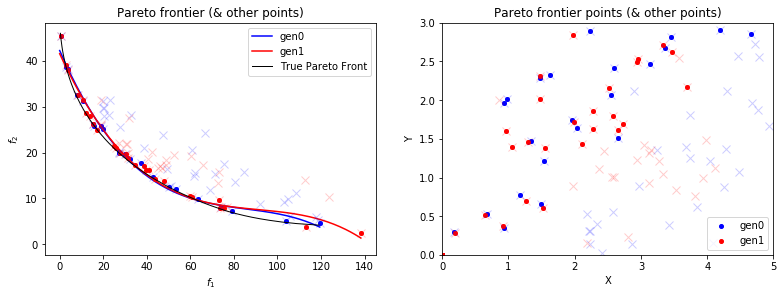

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=((max(all_values[:,0])-min(all_values[:,0]))/10, (max(all_values[:,1])-min(all_values[:,1]))/10))
ax1.plot(paretoFront[0,:,0], paretoFront[0,:,1],'.',c='b', markersize=8)
ax1.plot(np.linspace(0,max(paretoFront[0,:,0]),141), fit0(np.linspace(0,max(paretoFront[0,:,0]),141)), c='b', label='gen0')
ax1.plot(paretoFront[1,:,0], paretoFront[1,:,1],'.',c='r', markersize=8)
ax1.plot(np.linspace(0,max(paretoFront[1,:,0]),200), fit1(np.linspace(0,max(paretoFront[1,:,0]),200)), c='r',label='gen1')
ax1.plot(funEval[0,:,0],funEval[0,:,1],'x',c='b', markersize=8, alpha=0.2)
ax1.plot(funEval[1,:,0],funEval[1,:,1],'x',c='r', markersize=8, alpha=0.2)
ax1.plot(TPF[np.argsort(TPF[:,0]),0],TPF[np.argsort(TPF[:,0]),1], 'k', linewidth=1,label='True Pareto Front')
ax1.plot([0], [0], 's',c='white', markersize=8) #let's hide the zero matrix associated
ax1.set_xlabel('$f_1$')
ax1.set_ylabel('$f_2$')
ax1.set_title('Pareto frontier (& other points)')
ax1.legend()
ax2.plot(paretoFront[0,:,2], paretoFront[0,:,3],'.',c='b', markersize=8, label='gen0')
ax2.plot(paretoFront[1,:,2], paretoFront[1,:,3],'.',c='r', markersize=8, label='gen1')
ax2.plot(generation[0,:,0],generation[0,:,1],'x',c='b', markersize=8, alpha=0.2)
ax2.plot(generation[1,:,0],generation[1,:,1],'x',c='r', markersize=8, alpha=0.2)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_xlim([x_low, x_high])
ax2.set_ylim([y_low, y_high])
ax2.set_title('Pareto frontier points (& other points)')
ax2.legend(loc='lower right')

## 3.3 Evolution of the generations
Once the generation zero has been computed - and it is more or less working - let's evolve the system for the specified number of generations with a function for some given inputs:

In [42]:
def GA_multiobjective(noGApoints, genLim, x_low, x_high, y_low, y_high):
    #Function attribute to count callings (future CFD simulations)
    fun.counter = 0
    #Get the generation matrix and the initial setup with random points as before
    generation = np.zeros([genLim, noGApoints, 2])
    generation[0,:,0] = x_low+np.random.rand(noGApoints)*(x_high-x_low)
    generation[0,:,1] = y_low+np.random.rand(noGApoints)*(y_high-y_low)
    #Preallocation of other neccessary arrays
    paretoFront = np.zeros([genLim-1, noGApoints, funNo+2]) #Ideally a pareto front will have as many elements as points and the number of functions plus 2 coordinates
    funEval = np.zeros([genLim-1, noGApoints, funNo]) #Matrix to store the evaluations of the functions
    fitness = np.zeros([genLim-1, noGApoints, 2]) #Simple probabilty and cummuative normalized probability

    for j in range(genLim-1):
        #while some values are out of bounds (i.e. constrained) they will be replaced to get only possible values
        while sum(constrainedPts(generation[j,:,:], const, constVal, compMode)) != 0:
            boolMat = constrainedPts(generation[j,:,:], const, constVal, compMode)
            nonValidPts = sum(boolMat)
            nonConstPts = np.zeros([nonValidPts, 2])
            nonConstPts[:,0] = x_low+np.random.rand(nonValidPts)*(x_high-x_low)
            nonConstPts[:,1] = y_low+np.random.rand(nonValidPts)*(y_high-y_low)
            generation[j, boolMat] = nonConstPts
        #function evaluation
        for i in range(funNo):
            funEval[j,:,i] = fun(generation[j,:,0], generation[j,:,1], i)
        #Pareto front determination
        paretoFront_temp = skyline(generation[j,:,:], funEval[j,:,:])
        paretoFront[j,0:paretoFront_temp.shape[0],:] = paretoFront_temp
        #To select the individuals, the distance from each PF point to each evaluation point, taking the minimum one as fitness
        for i in range(noGApoints):
            dist = np.min(np.sqrt((funEval[j,i,0] - paretoFront_temp[:,0])**2+(funEval[j,i,1] - paretoFront_temp[:,1])**2)) 
            fitness[j,i,0] = np.min(dist)
        #Compute the fitness with the normalized distances calculated above
        fitness[j,:,0] = 1-fitness[j,:,0]/np.max(fitness[j,:,0]) #simple probability
        fitness[j,:,1] = np.cumsum(fitness[j,:,0]/sum(fitness[j,:,0])) #cummulative probability
        #Looping the whole generation
        for i in range(noGApoints):
            #If the firness is equal to one (i.e. point belong to PF) it will be slightly perturbed
            if fitness[j,i,0] == 1:
                generation[j+1,i,0] = generation[j,i,0]+generation[j,i,0]*np.random.normal(0.0,0.25)
                generation[j+1,i,1] = generation[j,i,1]+generation[j,i,1]*np.random.normal(0.0,0.25)
            #Otherwise, another point will be calculated 
            else:
                #Get a random individual from the generation (higher fitness will have greater possibilities to get choosed)
                dadPos = np.argmax(fitness[j,:,1]>np.random.rand())
                mumPos = np.argmax(fitness[j,:,1]>np.random.rand())
                #If they are the same, to promote variation, they are randomly picked again
                while dadPos == mumPos:
                    dadPos = np.argmax(fitness[j,:,1]>np.random.rand())
                    mumPos = np.argmax(fitness[j,:,1]>np.random.rand())
                #Get the value of the two parents in the current generation
                dad = generation[j,dadPos,:]
                mum = generation[j,mumPos,:]
                #Assign the value of the mean between the two individuals
                generation[j+1,i,0] = (dad[0]+mum[0])/2
                generation[j+1,i,1] = (dad[1]+mum[1])/2
                #Slightly mutate the new individuals
                generation[j+1,i,0] = generation[j+1,i,0] + generation[j+1,i,0]*np.random.normal(0.0,0.1)
                generation[j+1,i,1] = generation[j+1,i,1] + generation[j+1,i,1]*np.random.normal(0.0,0.1)
    return generation, paretoFront, funEval, fitness, fun.counter

In [43]:
noGApoints = 50
genLim = 4
generation, paretoFront, funEval, fitness, GA_eval = GA_multiobjective(noGApoints, genLim, 0, 5, 0, 3)

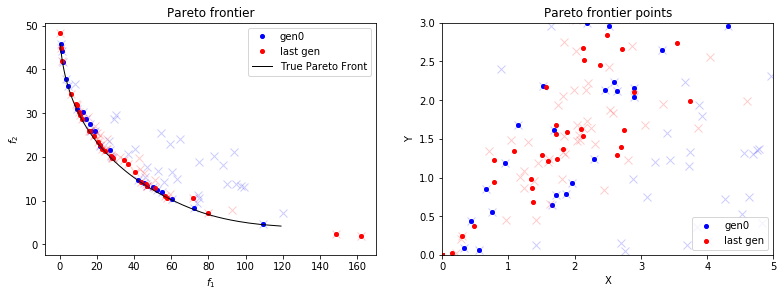

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=((max(all_values[:,0])-min(all_values[:,0]))/10, (max(all_values[:,1])-min(all_values[:,1]))/10))
ax1.plot(paretoFront[0,:,0], paretoFront[0,:,1],'.',c='b', markersize=8, label='gen0')
ax1.plot(paretoFront[-1,:,0], paretoFront[-1,:,1],'.',c='r', markersize=8, label='last gen')
ax1.plot(TPF[np.argsort(TPF[:,0]),0],TPF[np.argsort(TPF[:,0]),1], 'k', linewidth=1,label='True Pareto Front')
ax1.plot(funEval[0,:,0],funEval[0,:,1],'x',c='b', markersize=8, alpha=0.2)
ax1.plot(funEval[-1,:,0],funEval[-1,:,1],'x',c='r', markersize=8, alpha=0.2)
ax1.plot([0], [0], 's',c='white', markersize=8) #let's hide the zeros matrix associated
ax1.set_xlabel('$f_1$')
ax1.set_ylabel('$f_2$')
ax1.set_title('Pareto frontier')
ax1.legend()
ax2.plot(paretoFront[0,:,2], paretoFront[0,:,3],'.',c='b', markersize=8, label='gen0')
ax2.plot(paretoFront[-1,:,2], paretoFront[-1,:,3],'.',c='r', markersize=8, label='last gen')
ax2.plot(generation[0,:,0],generation[0,:,1],'x',c='b', markersize=8, alpha=0.2)
ax2.plot(generation[-1,:,0],generation[-1,:,1],'x',c='r', markersize=8, alpha=0.2)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_xlim([x_low, x_high])
ax2.set_ylim([y_low, y_high])
ax2.set_title('Pareto frontier points')
ax2.legend(loc='lower right')

It can be seen that with less than half the evaluations needed for the Monte Carlo approach, the genetic algorithm method gives results accurate enough that follow the trend of the system that it is being analyzed.

In [45]:
PFf1 = (paretoFront[paretoFront[:,:,0] != 0])[:,0]
PFf2 = (paretoFront[paretoFront[:,:,0] != 0])[:,1]
PFx = (paretoFront[paretoFront[:,:,0] != 0])[:,2]
PFy = (paretoFront[paretoFront[:,:,0] != 0])[:,3]
    
PF_GA = skyline(np.array([PFx,PFy]).T,np.array([PFf1,PFf2]).T)

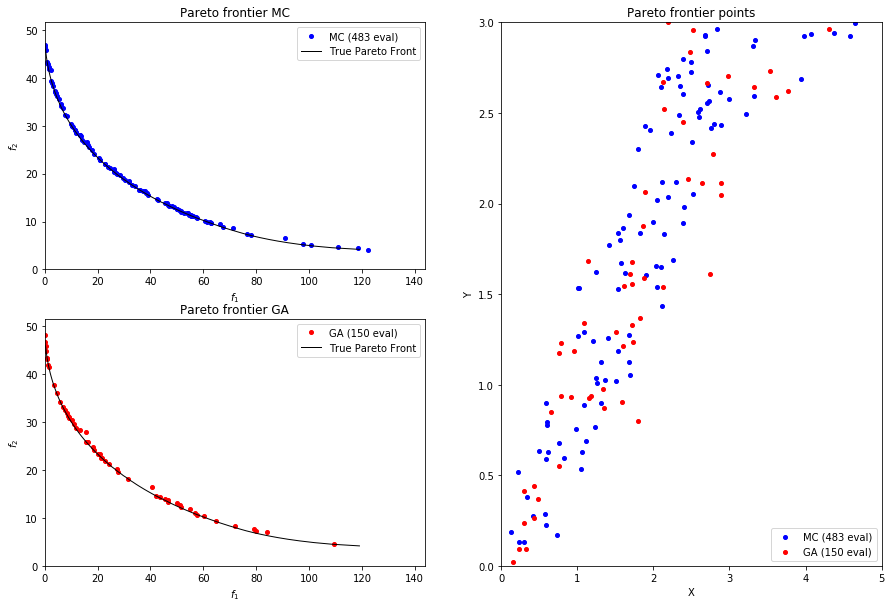

In [46]:
fig = plt.figure(figsize=(15, 10))
grid = plt.GridSpec(2, 2, wspace=0.2, hspace=0.2)
axMC = fig.add_subplot(grid[0,0])
axGA = fig.add_subplot(grid[1, 0])
axPts = fig.add_subplot(grid[0:, 1:])

axMC.plot(PF[:,0], PF[:,1],'.',c='b', markersize=8, label='MC (%i eval)' %MC_eval)
axMC.plot(TPF[np.argsort(TPF[:,0]),0],TPF[np.argsort(TPF[:,0]),1], 'k', linewidth=1,label='True Pareto Front')
axMC.set_xlabel('$f_1$')
axMC.set_ylabel('$f_2$')
axMC.set_xlim([0, 1.1*max(all_values[:,0])])
axMC.set_ylim([0, 1.1*max(all_values[:,1])])
axMC.set_title('Pareto frontier MC')
axMC.legend()

axGA.plot(PF_GA[:,0], PF_GA[:,1],'.',c='r', markersize=8, label='GA (%i eval)' %GA_eval)
axGA.plot(TPF[np.argsort(TPF[:,0]),0],TPF[np.argsort(TPF[:,0]),1], 'k', linewidth=1,label='True Pareto Front')
axGA.set_xlabel('$f_1$')
axGA.set_ylabel('$f_2$')
axGA.set_xlim([0, 1.1*max(all_values[:,0])])
axGA.set_ylim([0, 1.1*max(all_values[:,1])])
axGA.set_title('Pareto frontier GA')
axGA.legend()

axPts.plot(PF[:,2], PF[:,3],'.',c='b', markersize=8, label='MC (%i eval)' %MC_eval)
axPts.plot(PF_GA[:,2], PF_GA[:,3],'.',c='r', markersize=8, label='GA (%i eval)' %GA_eval)
axPts.set_xlabel('X')
axPts.set_ylabel('Y')
axPts.set_xlim([x_low, x_high])
axPts.set_ylim([y_low, y_high])
axPts.set_title('Pareto frontier points')
axPts.legend(loc='lower right')

# 4. Genetic algorithm attemp ** with elitism ** in individuals selection

In [47]:
def GA_multiobjective_elitism(noGApoints, genLim, x_low, x_high, y_low, y_high):
    #Function attribute to count callings (future CFD simulations)
    fun.counter = 0
    #Get the generation matrix and the initial setup with random points as before
    generation = np.zeros([genLim, noGApoints, 2])
    generation[0,:,0] = x_low+np.random.rand(noGApoints)*(x_high-x_low)
    generation[0,:,1] = y_low+np.random.rand(noGApoints)*(y_high-y_low)
    #Preallocation of other neccessary arrays
    paretoFront = np.zeros([genLim-1, noGApoints, funNo+2]) #Ideally a pareto front will have as many elements as points and the number of functions plus 2 coordinates
    funEval = np.zeros([genLim-1, noGApoints, funNo]) #Matrix to store the evaluations of the functions
    fitness = np.zeros([genLim-1, noGApoints, 2]) #Simple probabilty and cummuative normalized probability

    for j in range(genLim-1):
        #while some values are out of bounds (i.e. constrained) they will be replaced to get only possible values
        while sum(constrainedPts(generation[j,:,:], const, constVal, compMode)) != 0:
            boolMat = constrainedPts(generation[j,:,:], const, constVal, compMode)
            nonValidPts = sum(boolMat)
            nonConstPts = np.zeros([nonValidPts, 2])
            nonConstPts[:,0] = x_low+np.random.rand(nonValidPts)*(x_high-x_low)
            nonConstPts[:,1] = y_low+np.random.rand(nonValidPts)*(y_high-y_low)
            generation[j, boolMat] = nonConstPts
        #function evaluation
        for i in range(funNo):
            funEval[j,:,i] = fun(generation[j,:,0], generation[j,:,1], i)
        #Pareto front determination
        paretoFront_temp = skyline(generation[j,:,:], funEval[j,:,:])
        paretoFront[j,0:paretoFront_temp.shape[0],:] = paretoFront_temp
        #To select the individuals, the distance from each PF point to each evaluation point, taking the minimum one as fitness
        for i in range(noGApoints):
            dist = np.min(np.sqrt((funEval[j,i,0] - paretoFront_temp[:,0])**2+(funEval[j,i,1] - paretoFront_temp[:,1])**2)) 
            fitness[j,i,0] = np.min(dist)
        #Compute the fitness with the normalized distances calculated above
        fitness[j,:,0] = 1-fitness[j,:,0]/np.max(fitness[j,:,0]) #simple probability
        fitness[j,:,1] = np.cumsum(fitness[j,:,0]/sum(fitness[j,:,0])) #cummulative probability
        #Looping the whole generation
        for i in range(noGApoints):
            #If the firness is equal to one (i.e. point belong to PF) it will be KEEP as part of elitism
            if fitness[j,i,0] == 1:
                generation[j+1,i,0] = generation[j,i,0]
                generation[j+1,i,1] = generation[j,i,1]
            #Otherwise, another point will be calculated 
            else:
                #Get a random individual from the generation (higher fitness will have greater possibilities to get choosed)
                dadPos = np.argmax(fitness[j,:,1]>np.random.rand())
                mumPos = np.argmax(fitness[j,:,1]>np.random.rand())
                #If they are the same, to promote variation, they are randomly picked again
                while dadPos == mumPos:
                    dadPos = np.argmax(fitness[j,:,1]>np.random.rand())
                    mumPos = np.argmax(fitness[j,:,1]>np.random.rand())
                #Get the value of the two parents in the current generation
                dad = generation[j,dadPos,:]
                mum = generation[j,mumPos,:]
                #Assign the value of the mean between the two individuals
                generation[j+1,i,0] = (dad[0]+mum[0])/2
                generation[j+1,i,1] = (dad[1]+mum[1])/2
                #Slightly mutate the new individuals
                generation[j+1,i,0] = generation[j+1,i,0] + generation[j+1,i,0]*np.random.normal(0.0,0.1)
                generation[j+1,i,1] = generation[j+1,i,1] + generation[j+1,i,1]*np.random.normal(0.0,0.1)
    return generation, paretoFront, funEval, fitness, fun.counter

In [48]:
generationE, paretoFrontE, funEvalE, fitnessE, GA_evalE = GA_multiobjective_elitism(noGApoints, genLim, 0, 5, 0, 3)

In [40]:
paretoGAno = sum(paretoFront[-1,:,0] != 0)
paretoGAEno = sum(paretoFrontE[-1,:,0] != 0)

paretoGA = paretoFront[-1,paretoFront[-1,:,:] != 0].reshape((paretoGAno, 4))
paretoGAE = paretoFrontE[-1,paretoFrontE[-1,:,:] != 0].reshape((paretoGAEno, 4))

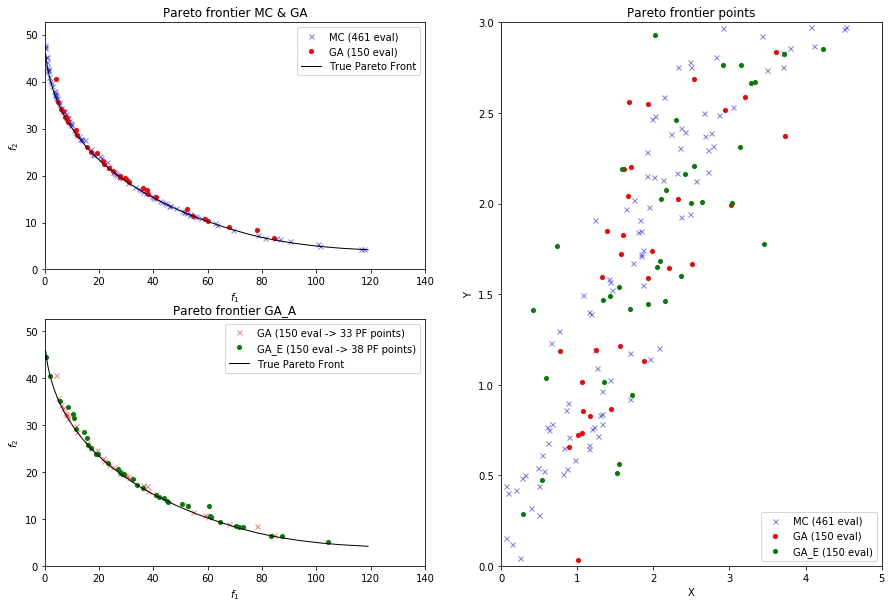

In [41]:
fig = plt.figure(figsize=(15, 10))
grid = plt.GridSpec(2, 2, wspace=0.2, hspace=0.2)
axGA = fig.add_subplot(grid[0, 0])
axGAE = fig.add_subplot(grid[1,0])
axPts = fig.add_subplot(grid[0:, 1:])

axGA.plot(PF[:,0], PF[:,1],'x',c='b', markersize=5, alpha=0.5, label='MC (%i eval)' %MC_eval)
axGA.plot(paretoGA[:,0], paretoGA[:,1],'.',c='r', markersize=8, label='GA (%i eval)' %GA_eval)
axGA.plot(TPF[np.argsort(TPF[:,0]),0],TPF[np.argsort(TPF[:,0]),1], 'k', linewidth=1,label='True Pareto Front')
axGA.set_xlabel('$f_1$')
axGA.set_ylabel('$f_2$')
axGA.set_xlim([0, 1.1*max(all_values[:,0])])
axGA.set_ylim([0, 1.1*max(all_values[:,1])])
axGA.set_title('Pareto frontier MC & GA')
axGA.legend()

axGAE.plot(paretoGA[:,0], paretoGA[:,1],'x',c='r', markersize=5, alpha=0.5, label='GA (%i eval -> %i PF points)' %(GA_eval, paretoGAno))
axGAE.plot(paretoGAE[:,0], paretoGAE[:,1],'.',c='g', markersize=8, label='GA_E (%i eval -> %i PF points)' %(GA_evalE, paretoGAEno))
axGAE.plot(TPF[np.argsort(TPF[:,0]),0],TPF[np.argsort(TPF[:,0]),1], 'k', linewidth=1,label='True Pareto Front')
axGAE.set_xlabel('$f_1$')
axGAE.set_ylabel('$f_2$')
axGAE.set_xlim([0, 1.1*max(all_values[:,0])])
axGAE.set_ylim([0, 1.1*max(all_values[:,1])])
axGAE.set_title('Pareto frontier GA_A')
axGAE.legend()

axPts.plot(PF[:,2], PF[:,3],'x',c='b', markersize=5, alpha=0.5, label='MC (%i eval)' %MC_eval)
axPts.plot(paretoGA[:,2], paretoGA[:,3],'.',c='r', markersize=8, label='GA (%i eval)' %GA_eval)
axPts.plot(paretoGAE[:,2], paretoGAE[:,3],'.',c='g', markersize=8, label='GA_E (%i eval)' %GA_evalE)
axPts.set_xlabel('X')
axPts.set_ylabel('Y')
axPts.set_xlim([x_low, x_high])
axPts.set_ylim([y_low, y_high])
axPts.set_title('Pareto frontier points')
axPts.legend(loc='lower right')

# 5. Performance measures
In order to decide which gaves the best results, some performance metrics will be defined (as described in http://ieeexplore.ieee.org/document/996017/):
$$
\begin{matrix}
    \text{Convergence metric: }\overline{\Upsilon} = \dfrac{1}{n} \left( \sum_{i=1}^{n} \text{min}( \text{dist}({PF_{GA}}_i,\mathcal{F}_0))\right) \\
    \ \\
    \text{Diversity metric: }\Delta = \dfrac{d_f + d_l + \sum_{i=1}^{N-1} \lvert d_i - \overline{d} \rvert}{d_f + d_l + (N-1)\overline{d}}
\end{matrix}
$$

Let's define a function to compute each one of these metrics, applying it afterwards to the values of each combination of points and generations.

In [204]:
def conv_metric(pareto, truePareto):
    mindst = np.zeros((len(pareto)))
    for i in range(len(pareto)):
        mindst[i] = (np.sqrt((truePareto[:]-pareto[i,:])[:,0]**2+(truePareto[:]-pareto[i,:])[:,1]**2)).min()
    return mindst.mean(), mindst.std()

In [205]:
def diver_metric(pareto, truePareto):
    extrf1 = truePareto[np.argmax(truePareto[:,0]),:]
    extrf2 = truePareto[np.argmax(truePareto[:,1]),:]
    d_i = np.zeros((len(pareto)-1))
    for i in range(len(d_i)):
        d_i[i] = np.sqrt((pareto[i+1]-pareto[i])[0]**2+(pareto[i+1]-pareto[i])[1]**2)
    dl = np.sqrt((pareto[np.argmax(pareto[:,1]),:][0]-extrf2[0])**2+(pareto[np.argmax(pareto[:,1]),:][1]-extrf2[1])**2)
    df = np.sqrt((pareto[np.argmax(pareto[:,0]),:][0]-extrf1[0])**2+(pareto[np.argmax(pareto[:,0]),:][1]-extrf1[1])**2)
    delta = (df+dl+np.sum(np.abs(d_i-d_i.mean())))/(df+dl+(len(d_i))*d_i.mean())
    return delta

# 5. Optimal points and number of generation values
Elitism is usually preferred in the algorithms, although for this case the differences are nothing more than a wider Pareto front. In order to reduce evaluations to the maximum it is important to do an analysis on different configurations of the number of points and the limit of the generations. To do that, different cases will be executed to see which combination performs better.


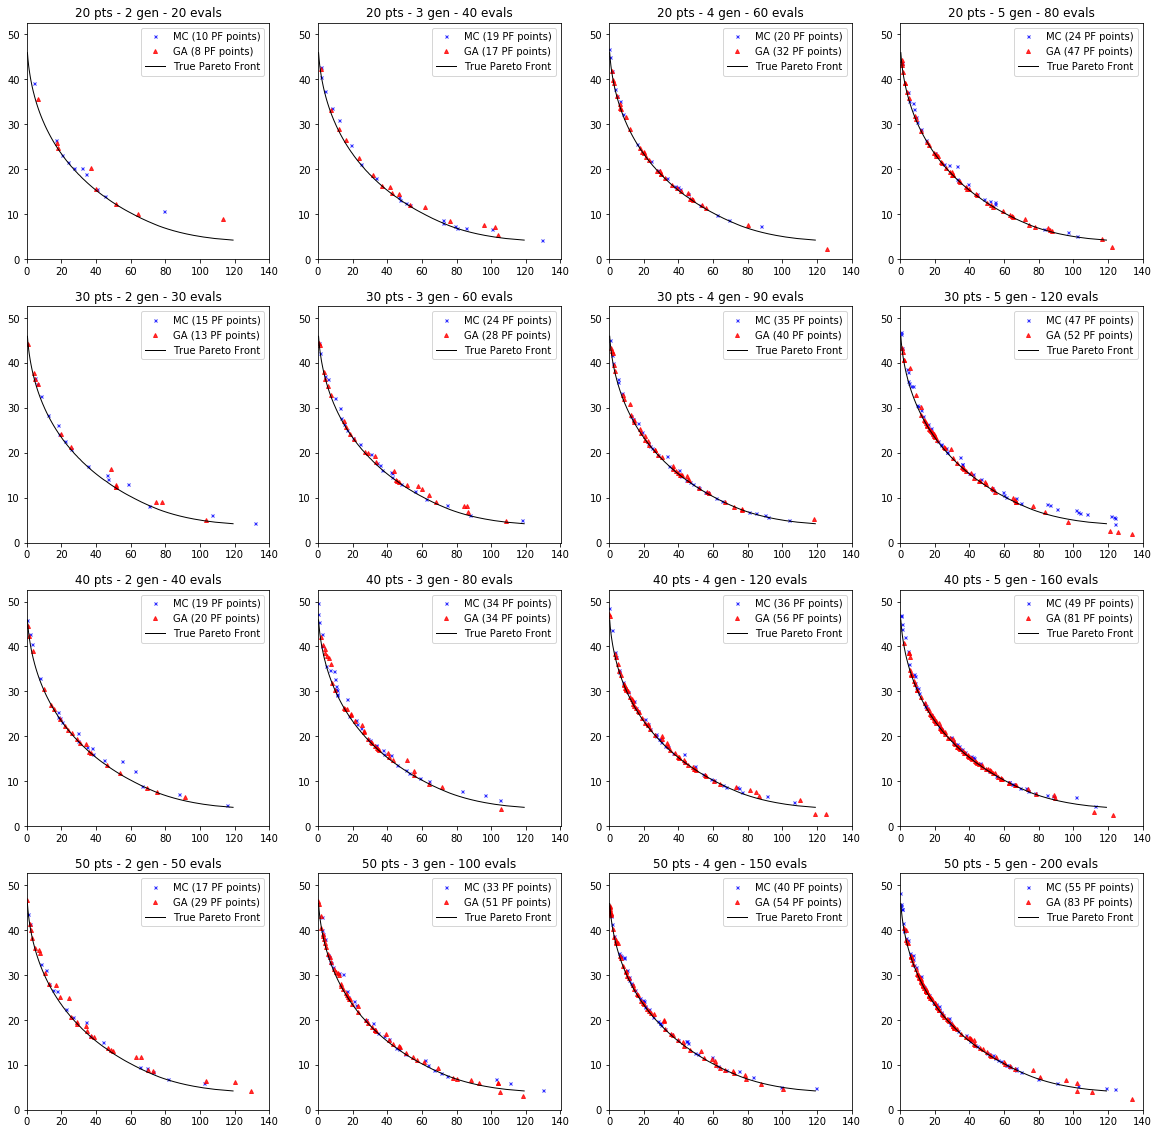

In [232]:
fig, ax = plt.subplots(4, 4, figsize=(20,20))

noGApoints = [20,30,40,50]
genLim = [2,3,4,5]

PFMC_tot = [[0 for x in range(len(noGApoints))] for y in range(len(genLim))]  # pts - genLim - paretoFront data
PFGA_tot = [[0 for x in range(len(noGApoints))] for y in range(len(genLim))]  # pts - genLim - paretoFront data
PFpoints = np.zeros((len(noGApoints),len(genLim),2)) # one for MC and another for GA

for i in range(len(noGApoints)):
    for j in range(len(genLim)):
        # We will use the same number of points for the three cases
        PF, MC_eval = GAMC(noGApoints[i]*(genLim[j]-1), 0, 5, 0, 3) 
        generation, paretoFront, funEval, fitness, GA_eval = GA_multiobjective(noGApoints[i], genLim[j], 0, 5, 0, 3)
        
        PFf1 = (paretoFront[paretoFront[:,:,0] != 0])[:,0]
        PFf2 = (paretoFront[paretoFront[:,:,0] != 0])[:,1]
        PFx = (paretoFront[paretoFront[:,:,0] != 0])[:,2]
        PFy = (paretoFront[paretoFront[:,:,0] != 0])[:,3]
        PF_GA = skyline(np.array([PFx,PFy]).T,np.array([PFf1,PFf2]).T)
        
        PFMC_tot[i][j] = PF
        PFGA_tot[i][j] = PF_GA
        PFpoints[i,j,:] = np.array([len(PF[:,0]),len(PF_GA[:,0])])
        
        ax[i][j].plot(PF[:,0], PF[:,1],'x',c='b', markersize=3, alpha=0.8, label='MC (%i PF points)' %len(PF[:,0]))
        ax[i][j].plot(PF_GA[:,0], PF_GA[:,1],'^',c='r', markersize=4, alpha=0.8, label='GA (%i PF points)' %len(PF_GA[:,0]))
        ax[i][j].plot(TPF[np.argsort(TPF[:,0]),0],TPF[np.argsort(TPF[:,0]),1], 'k', linewidth=1,label='True Pareto Front')
        ax[i][j].set_xlim([0, 1.1*max(all_values[:,0])])
        ax[i][j].set_ylim([0, 1.1*max(all_values[:,1])])
        ax[i][j].set_title('%i pts - %i gen - %i evals' %(noGApoints[i],genLim[j],GA_eval))
        ax[i][j].legend()
        
plt.savefig('MC_GA_GAE.png', bbox_inches = 'tight', dpi=100)

In [233]:
paramMC = np.zeros((len(noGApoints),len(genLim),3)) # three values will be stored: mean and std of upsilon and delta
paramGA = np.zeros((len(noGApoints),len(genLim),3)) # three values will be stored: mean and std of upsilon and delta

for i in range(len(noGApoints)):
    for j in range(len(genLim)):
        paramMC[i,j,0:2] = conv_metric(PFMC_tot[i][j][:,0:2], TPF)
        paramMC[i,j,2] = diver_metric(PFMC_tot[i][j][:,0:2], TPF)
        paramGA[i,j,0:2] = conv_metric(PFGA_tot[i][j][:,0:2], TPF)
        paramGA[i,j,2] = diver_metric(PFGA_tot[i][j][:,0:2], TPF)

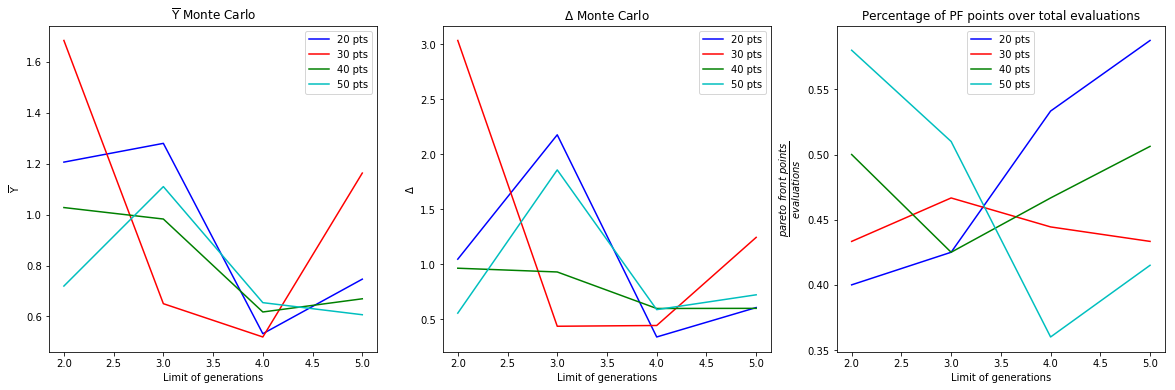

In [234]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

c = ['b','r','g','c']

for i in range(paramGA.shape[0]):
    tempM = []
    tempS = []
    tempD = []
    for j in range(paramGA.shape[1]):
        tempM.append(paramMC[i][j][0])
        tempS.append(paramMC[i][j][1])
        tempD.append(paramMC[i][j][1])
    ax1.plot(genLim,tempM,color = c[i], label='%i pts' %noGApoints[i])
    ax2.plot(genLim,tempD,color = c[i], label='%i pts' %noGApoints[i])
    
ax1.set_title(r'$\overline{\Upsilon}$ Monte Carlo')
ax1.set_xlabel('Limit of generations')
ax1.set_ylabel(r'$\overline{\Upsilon}$')
ax1.legend()

ax2.set_title(r'$\Delta$ Monte Carlo')
ax2.set_xlabel('Limit of generations')
ax2.set_ylabel(r'$\Delta$')
ax2.legend()

for i in range(paramGA.shape[0]):
    ax3.plot(genLim,PFpoints[i,:,1]/((np.asarray(genLim)-1)*noGApoints[i]),color = c[i],label='%i pts' %noGApoints[i])
ax3.set_title('Percentage of PF points over total evaluations')
ax3.set_xlabel('Limit of generations')
ax3.set_ylabel(r'$\dfrac{pareto\ front\ points}{evaluations}$')
ax3.legend()

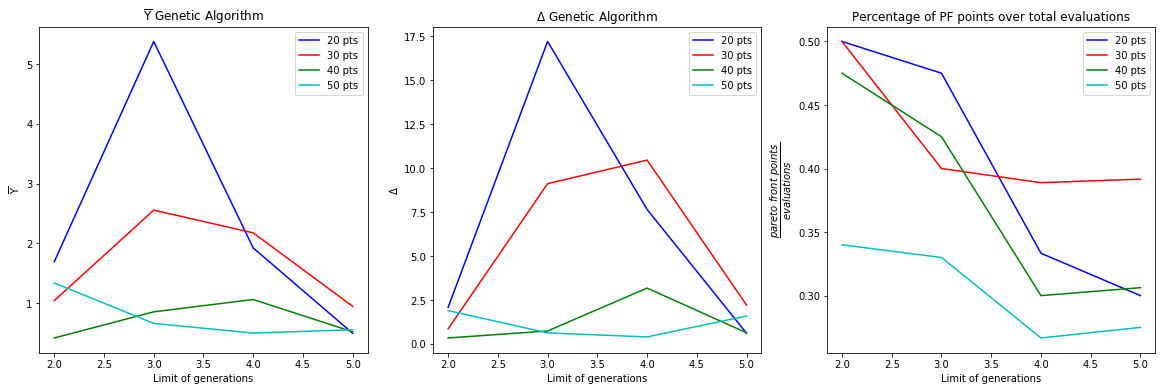

In [235]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

c = ['b','r','g','c']

for i in range(paramGA.shape[0]):
    tempM = []
    tempS = []
    tempD = []
    for j in range(paramGA.shape[1]):
        tempM.append(paramGA[i][j][0])
        tempS.append(paramGA[i][j][1])
        tempD.append(paramGA[i][j][1])
    ax1.plot(genLim,tempM,color = c[i], label='%i pts' %noGApoints[i])
    ax2.plot(genLim,tempD,color = c[i], label='%i pts' %noGApoints[i])
    
ax1.set_title(r'$\overline{\Upsilon}$ Genetic Algorithm')
ax1.set_xlabel('Limit of generations')
ax1.set_ylabel(r'$\overline{\Upsilon}$')
ax1.legend()

ax2.set_title(r'$\Delta$ Genetic Algorithm')
ax2.set_xlabel('Limit of generations')
ax2.set_ylabel(r'$\Delta$')
ax2.legend()

for i in range(paramGA.shape[0]):
    ax3.plot(genLim,PFpoints[i,:,0]/((np.asarray(genLim)-1)*noGApoints[i]),color = c[i],label='%i pts' %noGApoints[i])
ax3.set_title('Percentage of PF points over total evaluations')
ax3.set_xlabel('Limit of generations')
ax3.set_ylabel(r'$\dfrac{pareto\ front\ points}{evaluations}$')
ax3.legend()

## 7. Mean and standar deviation
Running different times the code, it can be seen that the values are very disperse and they vary a lot. Simulating the cases with the same setup could give a wider knowledge on how the mean and standard deviation behaves for the whole system and possible configurations

In [338]:
def mean_std_calculator():
    noGApoints = [20,30,40,50]
    genLim = [2,3,4,5]

    PFMC_tot = [[0 for x in range(len(noGApoints))] for y in range(len(genLim))]  # pts - genLim - paretoFront data
    PFGA_tot = [[0 for x in range(len(noGApoints))] for y in range(len(genLim))]  # pts - genLim - paretoFront data
    PFpoints = np.zeros((len(noGApoints),len(genLim),2)) # one for MC and another for GA

    for i in range(len(noGApoints)):
        for j in range(len(genLim)):
            # We will use the same number of points for the three cases
            PF, MC_eval = GAMC(noGApoints[i]*(genLim[j]-1), 0, 5, 0, 3) 
            generation, paretoFront, funEval, fitness, GA_eval = GA_multiobjective(noGApoints[i], genLim[j], 0, 5, 0, 3)

            PFf1 = (paretoFront[paretoFront[:,:,0] != 0])[:,0]
            PFf2 = (paretoFront[paretoFront[:,:,0] != 0])[:,1]
            PFx = (paretoFront[paretoFront[:,:,0] != 0])[:,2]
            PFy = (paretoFront[paretoFront[:,:,0] != 0])[:,3]
            PF_GA = skyline(np.array([PFx,PFy]).T,np.array([PFf1,PFf2]).T)

            PFMC_tot[i][j] = PF
            PFGA_tot[i][j] = PF_GA
            PFpoints[i,j,:] = np.array([len(PF[:,0]),len(PF_GA[:,0])])
    
    paramMC = np.zeros((len(noGApoints),len(genLim),3)) # three values will be stored: mean and std of upsilon and delta
    paramGA = np.zeros((len(noGApoints),len(genLim),3)) # three values will be stored: mean and std of upsilon and delta

    for i in range(len(noGApoints)):
        for j in range(len(genLim)):
            paramMC[i,j,0:2] = conv_metric(PFMC_tot[i][j][:,0:2], TPF)
            paramMC[i,j,2] = diver_metric(PFMC_tot[i][j][:,0:2], TPF)
            paramGA[i,j,0:2] = conv_metric(PFGA_tot[i][j][:,0:2], TPF)
            paramGA[i,j,2] = diver_metric(PFGA_tot[i][j][:,0:2], TPF)
            
    uMC = [] #Upsilon
    dMC = [] #Delta
    uGA = [] #Upsilon
    dGA = [] #Delta
    
    for i in range(len(noGApoints)):
        for j in range(len(genLim)):
            uMC.append(paramMC[i][j][0]) # Number of points - generation Limit
            dMC.append(paramMC[i][j][2]) # Number of points - generation Limit
            uGA.append(paramGA[i][j][0]) # Number of points - generation Limit
            dGA.append(paramGA[i][j][2]) # Number of points - generation Limit
            
    return uMC, dMC, uGA, dGA

In [348]:
uMC_T = []
dMC_T = []
uGA_T = []
dGA_T = []

for i in range(100):
    uMC, dMC, uGA, dGA = mean_std_calculator()
    uMC_T.append(uMC)
    dMC_T.append(dMC)
    uGA_T.append(uGA)
    dGA_T.append(dGA)

In [349]:
meanMC_U = np.asarray(uMC_T).mean(axis=0).reshape((4,4))
stdMC_U = np.asarray(uMC_T).std(axis=0).reshape((4,4))
meanMC_D = np.asarray(dMC_T).mean(axis=0).reshape((4,4))
stdMC_D = np.asarray(dMC_T).std(axis=0).reshape((4,4))

meanGA_U = np.asarray(uGA_T).mean(axis=0).reshape((4,4))
stdGA_U = np.asarray(uGA_T).std(axis=0).reshape((4,4))
meanGA_D = np.asarray(dGA_T).mean(axis=0).reshape((4,4))
stdGA_D = np.asarray(dGA_T).std(axis=0).reshape((4,4))

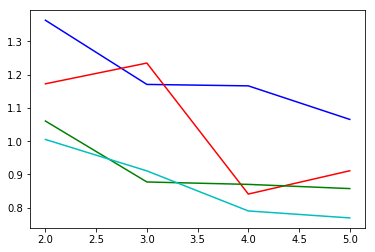

In [360]:
for i in range(4):
    plt.plot(genLim,meanGA_U[i],color=c[i])

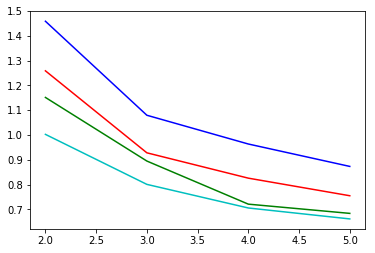

In [358]:
for i in range(4):
    plt.plot(genLim,meanMC_U[i],color=c[i])

In [380]:
s = []
for i in range(4):
    for j in range(4):
        s.append(((np.asarray(genLim)-1)*noGApoints[i])[j])

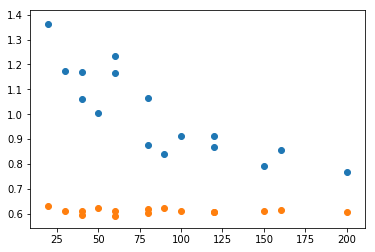

In [387]:
plt.scatter(np.sort(np.asarray(s)), meanGA_U.flatten()[np.argsort(np.asarray(s))])
plt.scatter(np.sort(np.asarray(s)), meanMC_D.flatten()[np.argsort(np.asarray(s))])

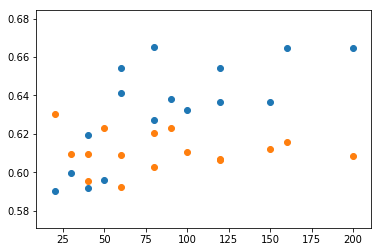

In [386]:
plt.scatter(np.sort(np.asarray(s)), meanGA_D.flatten()[np.argsort(np.asarray(s))])
plt.scatter(np.sort(np.asarray(s)), meanMC_D.flatten()[np.argsort(np.asarray(s))])